# Data Understanding - Initial Analysis

This notebook contains the initial exploratory analyses:\n
- Distribution of publications (year, month) and albums\n
- Distribution of languages\n
- Distribution of bad words (IT / EN)\n
- Distribution of musical features (bpm, loudness, centroid, rolloff, flux, rms, zcr, flatness, spectral_complexity, pitch)\n
- Distribution of lexical density\n
- Comparison of bad words between English and Italian

In [ ]:
# Import libraries
import ast
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

## Library Imports

In this section we import the necessary libraries for analysis:
- `pandas`: for data manipulation
- `numpy`: for numerical computations
- `matplotlib` and `seaborn`: for data visualization
- `ast`: for safe parsing of string lists
- `pathlib`: for file path management

In [2]:
# Load datasets
DATA_DIR = Path('..').joinpath('datasets') if Path('..').joinpath('datasets').exists() else Path('../datasets')
tracks_path = Path('../datasets/tracks.csv')
artists_path = Path('../datasets/artists.csv')
print('tracks exists:', tracks_path.exists())
print('artists exists:', artists_path.exists())
# read with pandas - tracks.csv appears to use comma delimiter
tracks = pd.read_csv(tracks_path, dtype=str, low_memory=False)
artists = pd.read_csv(artists_path, sep=';', dtype=str, low_memory=False)
# Convert numeric columns where appropriate (a few common ones)
numeric_cols = ['year','month','day','n_sentences','n_tokens','bpm','centroid','rolloff','flux','rms','zcr','flatness','spectral_complexity','pitch','loudness','duration_ms','popularity']
for c in numeric_cols:
    if c in tracks.columns:
        tracks[c] = pd.to_numeric(tracks[c], errors='coerce')

# Quick peek
print('tracks shape:', tracks.shape)
display(tracks.head(3))
print('artists shape:', artists.shape)
display(artists.head(3))

tracks exists: True
artists exists: True
tracks shape: (11166, 45)


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",False
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",False
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,...,album,1.0,1.0,193544.0,True,39.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",False


artists shape: (104, 14)


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,NaN,NaN,NaN,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.4424977,10.9857377
2,ART18853907,alfa,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset Loading

In this section we load the two main datasets:
1. `tracks.csv`: contains information about songs, including musical metadata, lyrics, and statistics
2. `artists.csv`: contains information about artists

Technical notes:
- `tracks.csv` uses comma as delimiter
- `artists.csv` uses semicolon as delimiter
- We automatically convert numeric columns using `pd.to_numeric()`
- We display the first few rows of both datasets for verification

Top 10 albums by track count:
 album_name
SANTANA MONEY GANG                                   132
Solo Un Uomo                                          48
L'ANGELO DALL'OCCHIALE DA SERA: COL CUORE IN GOLA     45
Il mio lato peggiore                                  42
Gentleman                                             41
23 6451                                               38
The Newkingztape, Vol. 1                              37
QVC 10 - Quello Che Vi Consiglio Vol. 10              34
La Divina Commedia                                    34
Di vizi di forma virtù                                34
Name: count, dtype: int64


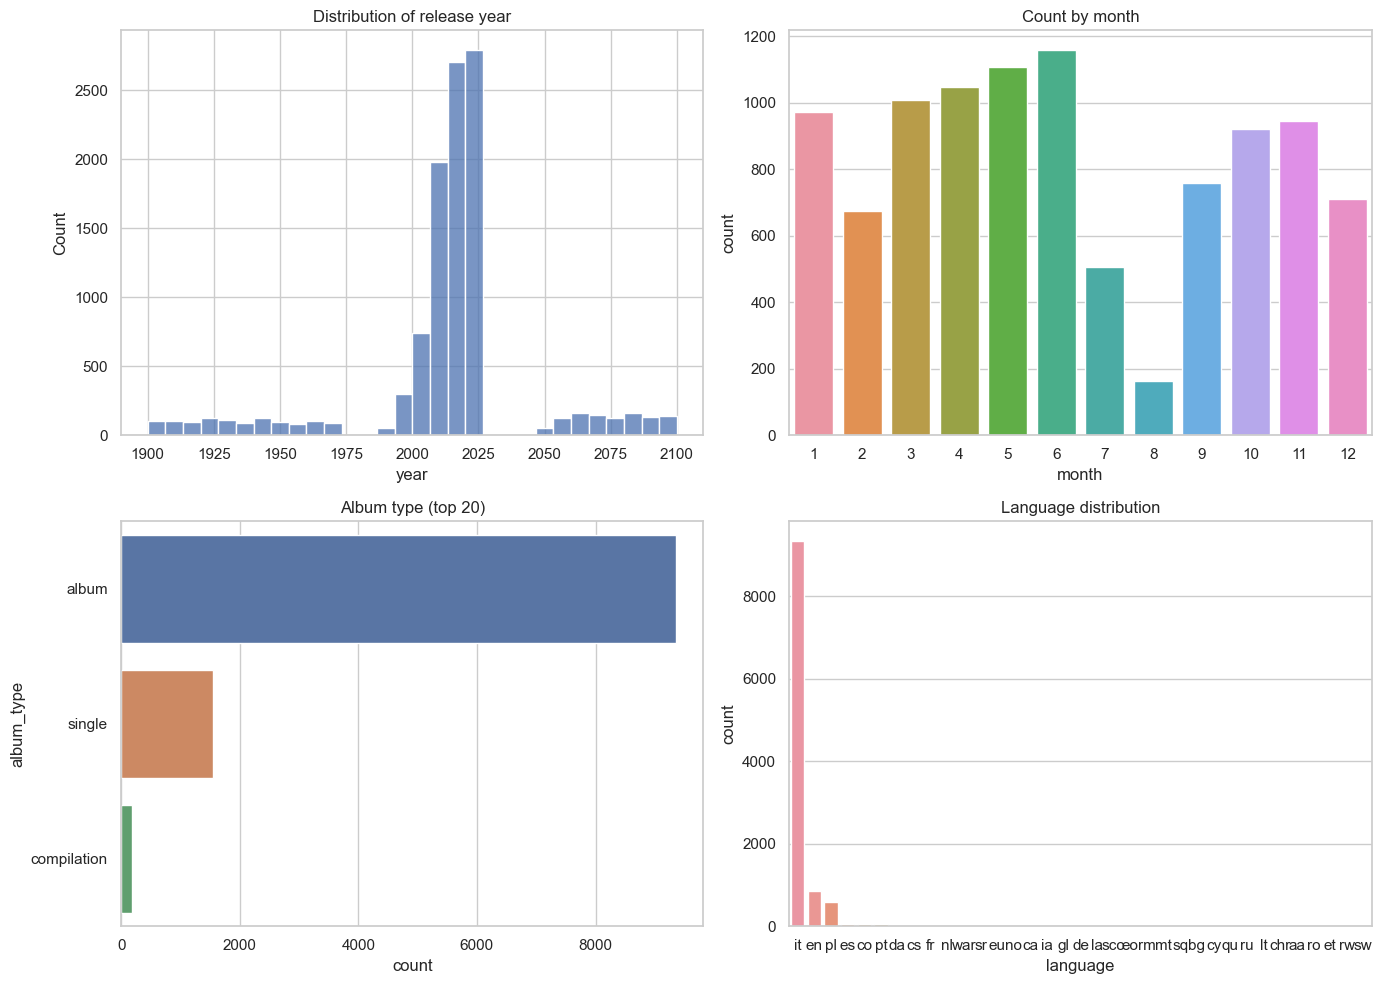

In [3]:
# Initial EDA: distributions for year, month, album_type, language
fig, axes = plt.subplots(2, 2, figsize=(14,10))
# Year distribution
if 'year' in tracks.columns:
    sns.histplot(tracks['year'].dropna().astype(int), bins=30, ax=axes[0,0])
    axes[0,0].set_title('Distribution of release year')
# Month distribution
if 'month' in tracks.columns:
    sns.countplot(x=tracks['month'].dropna().astype(int), ax=axes[0,1], order=sorted(tracks['month'].dropna().astype(int).unique()))
    axes[0,1].set_title('Count by month')
# Album type distribution
if 'album_type' in tracks.columns:
    sns.countplot(y=tracks['album_type'].fillna('unknown'), ax=axes[1,0], order=tracks['album_type'].value_counts().index[:20])
    axes[1,0].set_title('Album type (top 20)')
# Language distribution
if 'language' in tracks.columns:
    sns.countplot(x=tracks['language'].fillna('unknown'), ax=axes[1,1], order=tracks['language'].value_counts().index)
    axes[1,1].set_title('Language distribution')
plt.tight_layout()

# Show top albums by number of tracks / popularity summary
if 'album_name' in tracks.columns:
    top_albums = tracks['album_name'].value_counts().nlargest(10)
    print('Top 10 albums by track count:\n', top_albums)

## Initial Exploratory Data Analysis

This section contains the exploratory data analysis (EDA) focusing on:
1. **Temporal Distribution**:
   - Release year
   - Release month
2. **Album Types**:
   - Distribution of album types
   - Top 10 albums by number of tracks
3. **Language Distribution**:
   - Visualization of most used languages in songs

The plots are organized in a 2x2 grid for easy comparison.

In [4]:
# Parse bad-words fields and compute frequencies (IT and EN)
def safe_eval_list(x):
    try:
        if pd.isna(x) or x=='' or x=='[]':
            return []
        # some fields contain Python-like lists as strings: e.g. "['cazzo','merda']"
        return ast.literal_eval(x) if isinstance(x, str) else []
    except Exception:
        return []

tracks['swear_IT_list'] = tracks.get('swear_IT', '').apply(safe_eval_list)
tracks['swear_EN_list'] = tracks.get('swear_EN', '').apply(safe_eval_list)
# explode and count
swear_it = tracks.explode('swear_IT_list')['swear_IT_list'].dropna()
swear_en = tracks.explode('swear_EN_list')['swear_EN_list'].dropna()
print('Unique IT bad words:', swear_it.nunique())
print('Unique EN bad words:', swear_en.nunique())
print('Top 20 IT bad words:\n', swear_it.value_counts().head(20))
print('Top 20 EN bad words:\n', swear_en.value_counts().head(20))

Unique IT bad words: 44
Unique EN bad words: 40
Top 20 IT bad words:
 swear_IT_list
0     4176
1     2110
2     1383
3      978
4      694
5      495
6      339
7      245
8      180
9      134
10      89
11      66
12      47
14      33
13      32
15      24
17      18
16      18
23      13
21      13
Name: count, dtype: int64
Top 20 EN bad words:
 swear_EN_list
0     8426
1     1463
2      481
3      257
4      149
5       72
6       67
8       48
7       36
10      23
9       22
11      19
13      13
18      13
12      13
14       9
15       7
19       5
17       5
16       4
Name: count, dtype: int64


## Bad Words Analysis

This section examines the presence and frequency of inappropriate language in songs:
1. **Load Bad Words List**:
   - Import a pre-defined list of bad words
   - Set up the detection mechanism
2. **Count Bad Words**:
   - Calculate frequency per track
   - Identify songs with high counts
3. **Visualization**:
   - Distribution of bad words across tracks
   - Correlation with other features

The goal is to understand the prevalence of explicit content and its relationship with other musical characteristics.

Found musical columns: ['bpm', 'loudness', 'centroid', 'rolloff', 'flux', 'rms', 'zcr', 'flatness', 'spectral_complexity', 'pitch']


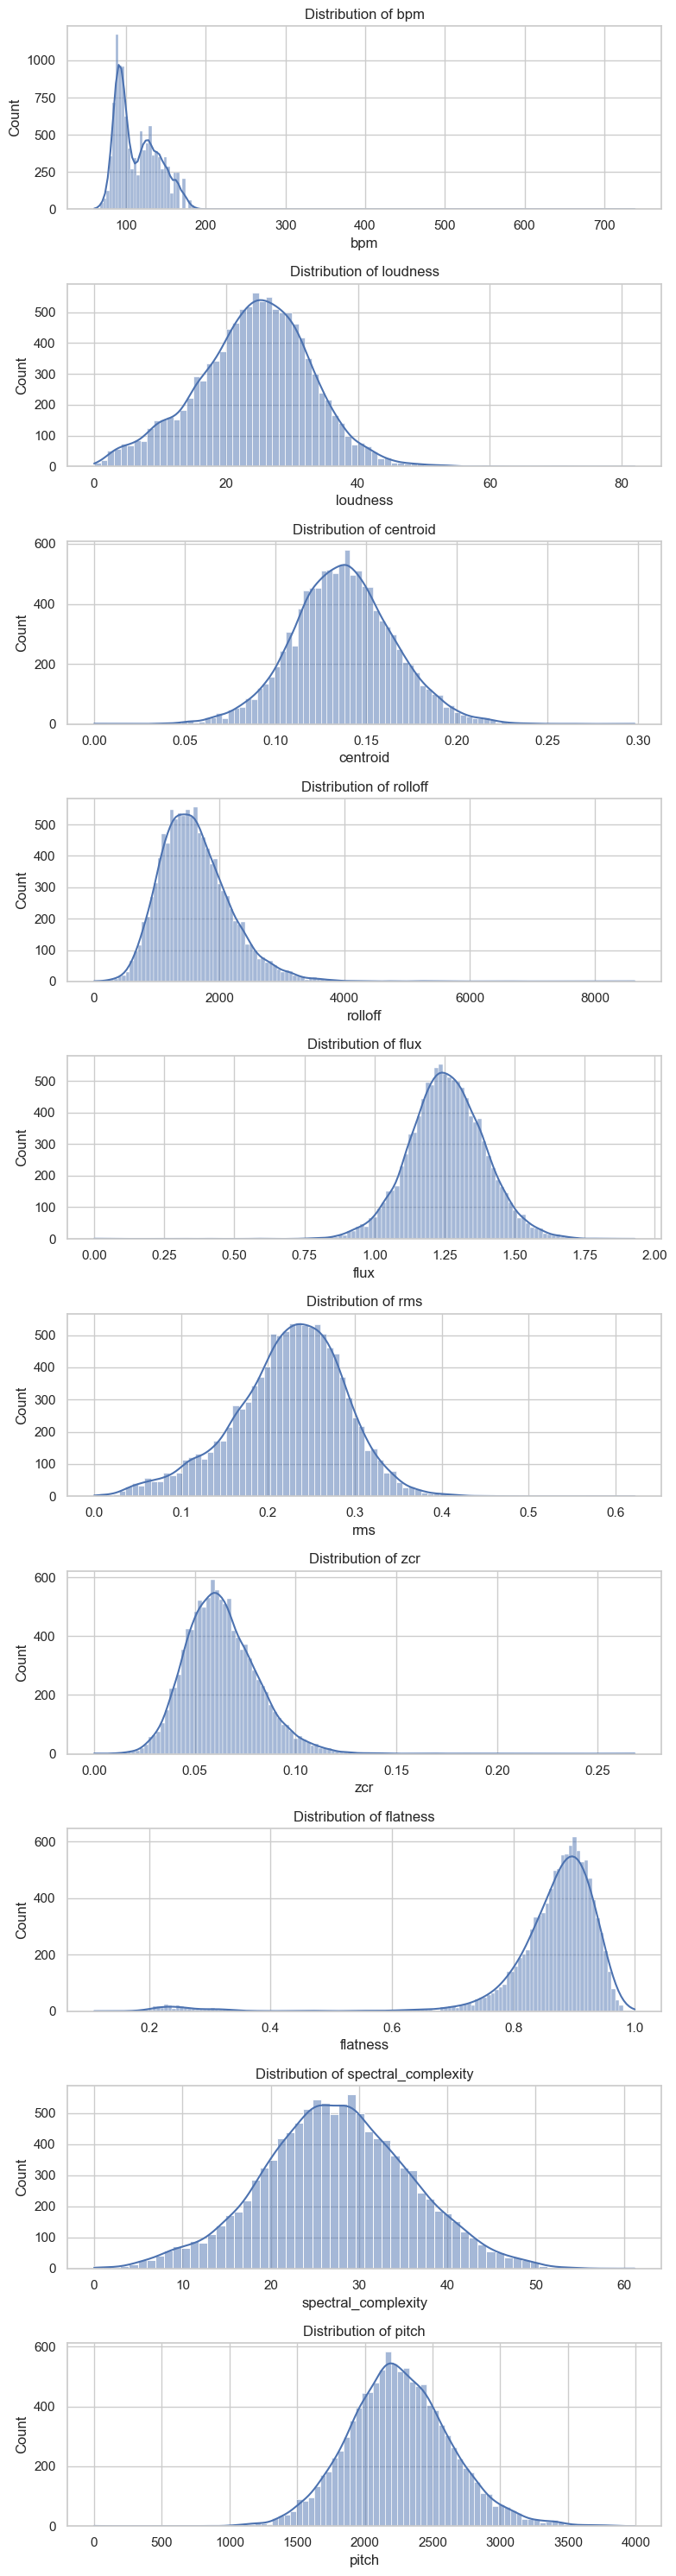

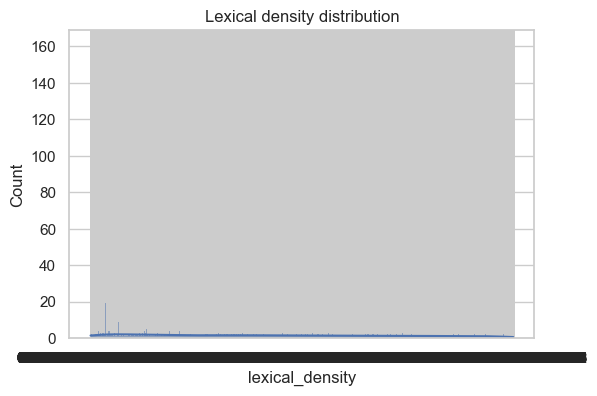

In [5]:
# Quick overview of musical features distributions
musical_cols = [c for c in ['bpm','loudness','centroid','rolloff','flux','rms','zcr','flatness','spectral_complexity','pitch'] if c in tracks.columns]
print('Found musical columns:', musical_cols)
if musical_cols:
    fig, axs = plt.subplots(len(musical_cols), 1, figsize=(8, 3*len(musical_cols)))
    for i,c in enumerate(musical_cols):
        ax = axs[i] if len(musical_cols)>1 else axs
        sns.histplot(tracks[c].dropna(), kde=True, ax=ax)
        ax.set_title(f'Distribution of {c}')
    plt.tight_layout()

# Lexical density distribution if available
if 'lexical_density' in tracks.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(tracks['lexical_density'].dropna(), kde=True, bins=40)
    plt.title('Lexical density distribution')
    plt.show()

## Musical Features Analysis

This section analyzes the musical characteristics of the tracks:
1. **Acoustic Features**:
   - Duration
   - Loudness
   - Tempo
   - Time signature
2. **Audio Properties**:
   - Acousticness
   - Danceability
   - Energy
   - Instrumentalness
3. **Musical Elements**:
   - Key distribution
   - Mode (major/minor)
   - Time signature patterns

The visualizations help understand:
- The distribution of each feature
- Relationships between different musical aspects
- Common patterns in contemporary music production
- Technical characteristics of popular tracks